## French house insurance prediction (MAPE metric)

### 2. French dataset

Target variable is prime_tot_ttc – house of insurance price.<p>
The variables in the files are:<p>
code_postal: postal code of the insured property<p>
nb_pieces: number of rooms<p>
veranda: presence of a veranda<p>
biens_nomades: ceiling of coverage of goods (laptop, tablets, musical instruments ,…)<p>
sit_fam: family situation of the insured<p>
profession: profession of the insured<p>
nature_lri: nature of the insured property<p>
societe: company covering the risk<p>
cdomact: area of activity of the insured<p>
niv_urbanisation: level of urbanization in which is the insured property<p>
age_societaire: age of the member<p>
objets_precieux: presence of precious objects in the insured property<p>
pres_contrat_auto: holding a contract of auto insurance<p>
formule: guarantee formula<p>
sit_juridique: legal situation<p>
surf_habitat: area of insured property<p>
patrimoine_mob: amount of heritage insured furniture<p>
var1 - ... - var11: non-explicit variables<p>

In [3]:
%matplotlib inline 
from matplotlib import pyplot as plt
import pandas_profiling
import seaborn
import pandas as pd

pd.set_option('display.max_columns', None)

**1.** Take a look carefuly at train and test dataset. Note for you what is the difference in them and how they are dependent. You may use any tool you like, any EDA you want. Decribe your validation and reason for your choice in google form.

**2.** 
+ Implement your validation. 
+ Generate additional features. 
+ Build a model you like/you can. 
+ Wait for training your model. If it takes too much time, listen to https://www.youtube.com/watch?v=XWkGL4eZR3E
+ Submit your scores on validation and test to google form. Use MAPE metric for scoring. 
+ Ланфрен ланфра лантатита

In [4]:
train = pd.read_csv('../data/train_french.csv')
test = pd.read_csv('../data/test_french.csv')

In [5]:
train.shape

(200000, 29)

In [6]:
test.shape

(75968, 29)

In [9]:
pandas_profiling.ProfileReport(train)

Number of variables,29
Number of observations,200000
Total Missing (%),0.0%
Total size in memory,44.3 MiB
Average record size in memory,232.0 B
Numeric,23
Categorical,6
Date,0
Text (Unique),0
Rejected,0
Distinct count,83


In [10]:
pandas_profiling.ProfileReport(test)

Number of variables,29
Number of observations,75968
Total Missing (%),0.0%
Total size in memory,16.8 MiB
Average record size in memory,232.0 B
Numeric,23
Categorical,6
Date,0
Text (Unique),0
Rejected,0
Distinct count,83


In [11]:
def MAPE(actual, forecast):
    if forecast.size != actual.size:
        raise ValueError('Forecast and actual data have different dimensions: F.size = {}, A.size = {}'.format(forecast.size, actual.size))
    
    forecast_series = pd.Series(forecast).reset_index(drop = True)
    actual_series = pd.Series(actual).reset_index(drop = True)
    
    error = forecast_series.fillna(0) - actual_series
    smape_series = error/actual_series
    
    smape_series.fillna(0, inplace = True)
    return 100*smape_series.abs().mean()

In [12]:
X_train = train.drop(['prime_tot_ttc'], axis = 'columns')
y_train = train['prime_tot_ttc']

X_test = test.drop(['prime_tot_ttc'], axis = 'columns')
y_test = test['prime_tot_ttc']

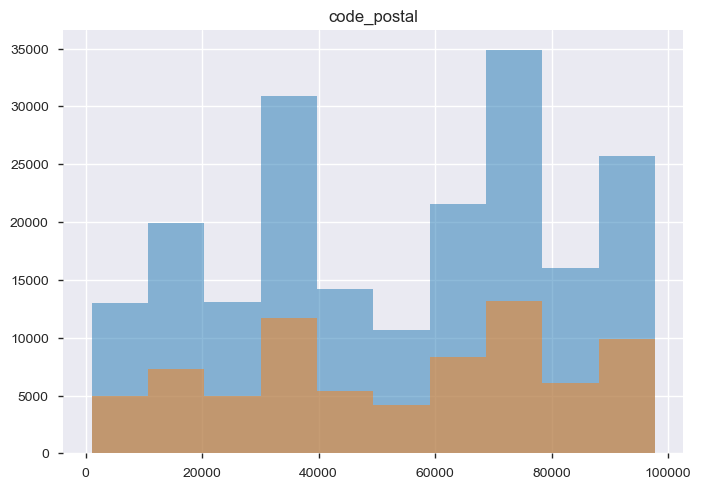

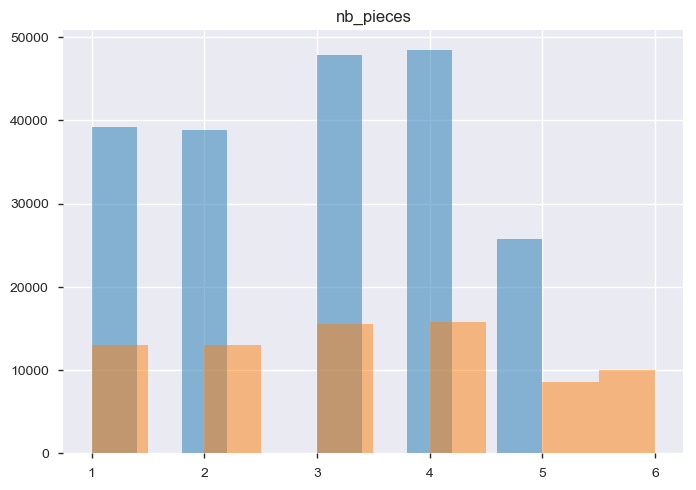

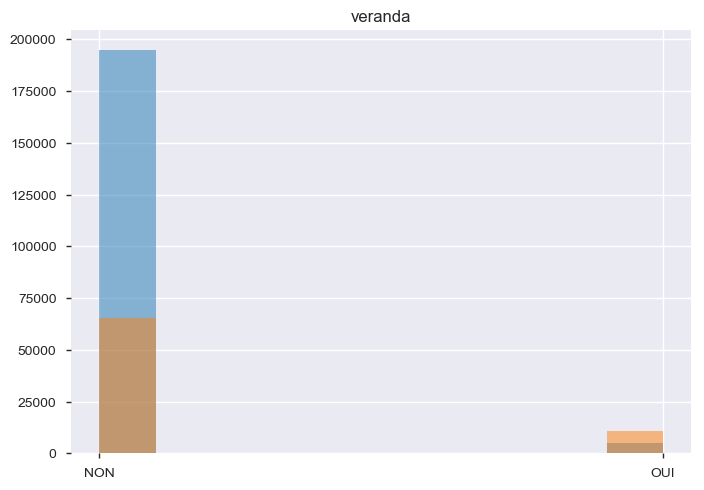

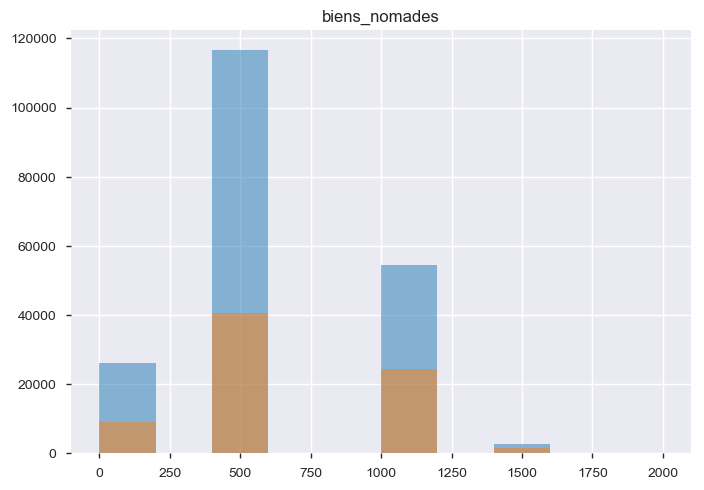

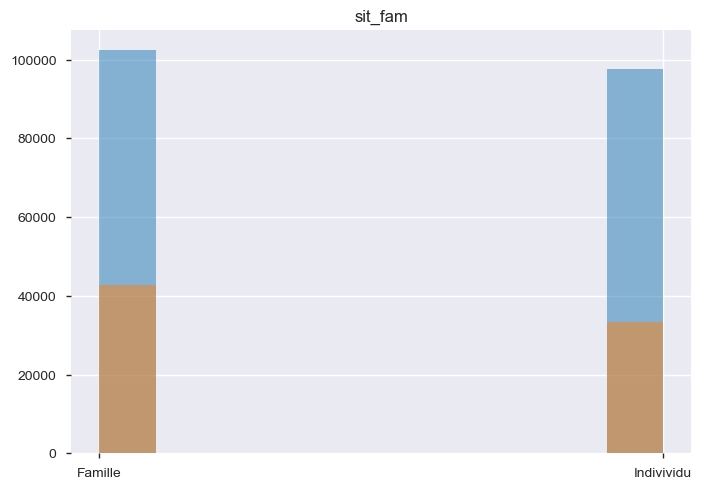

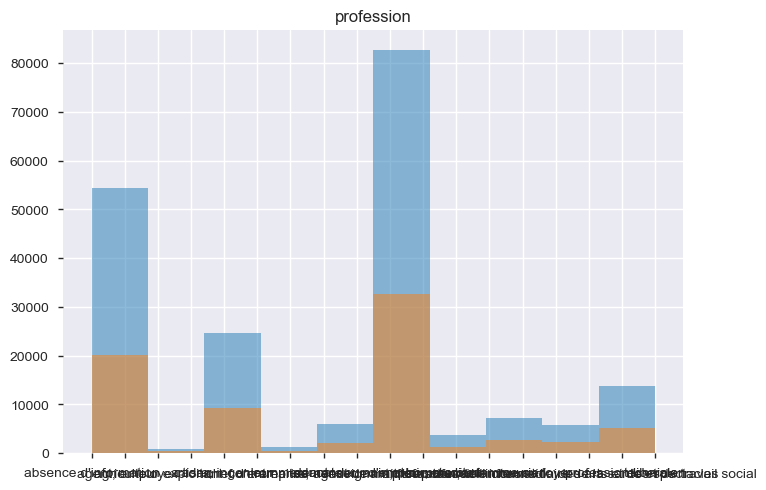

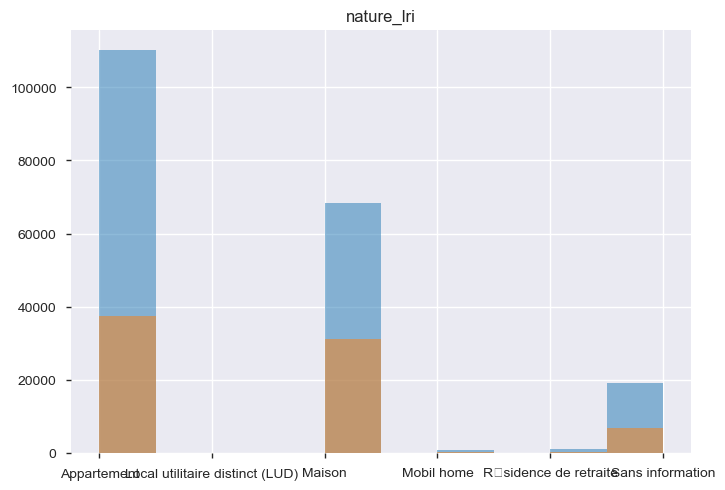

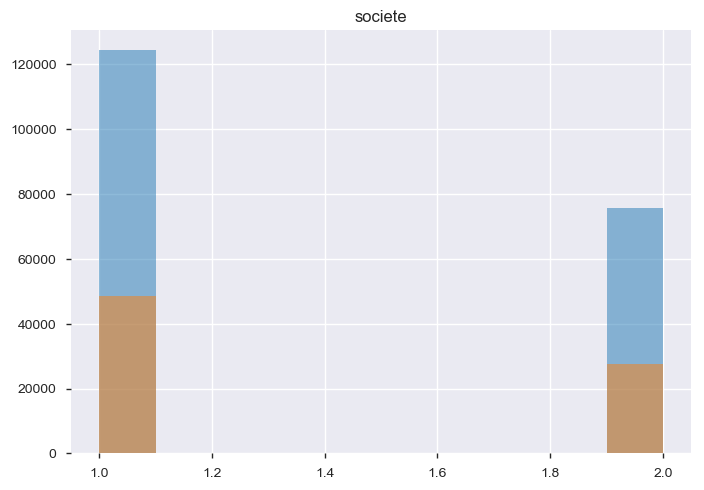

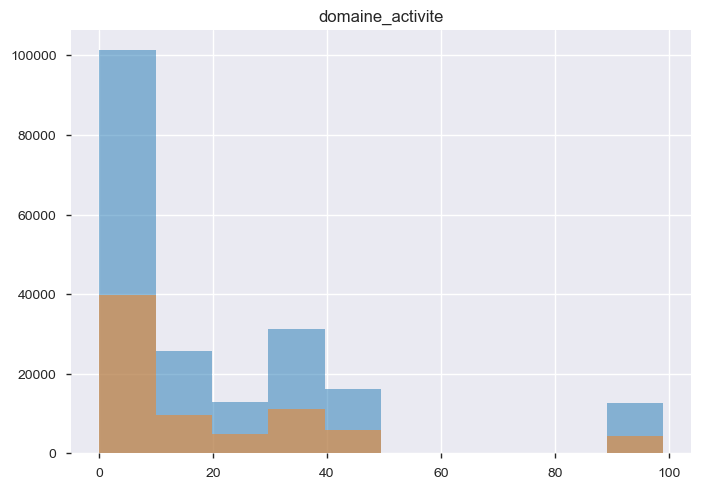

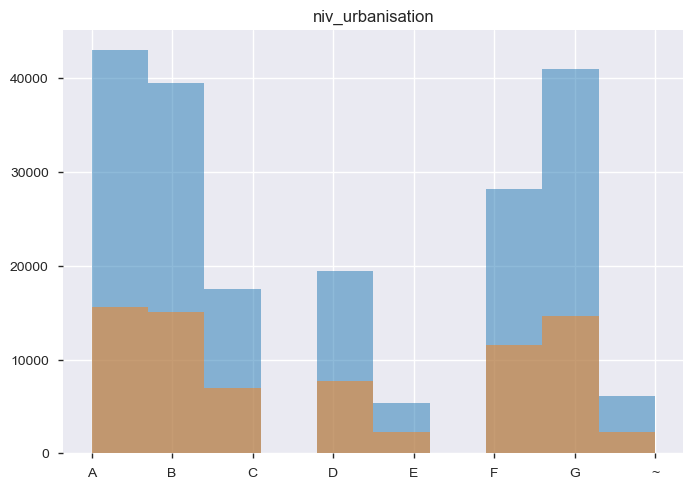

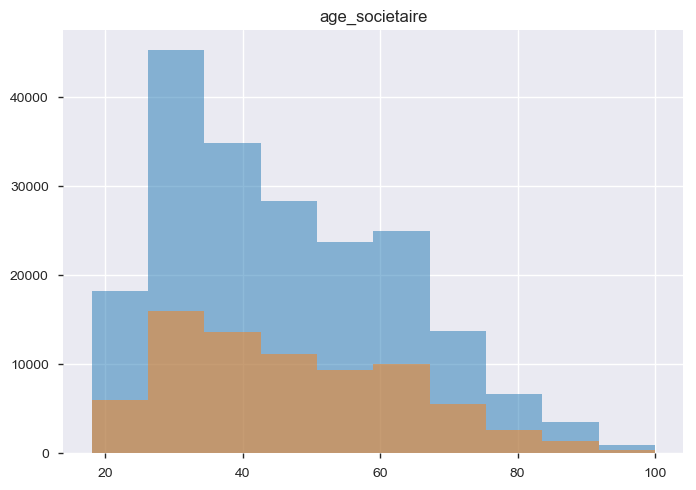

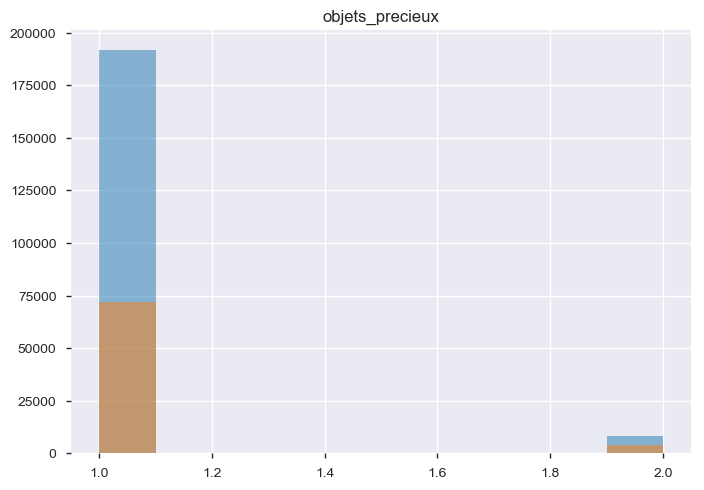

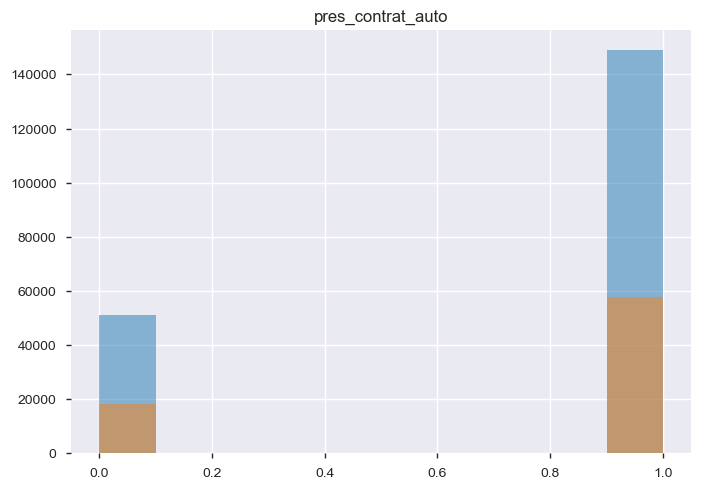

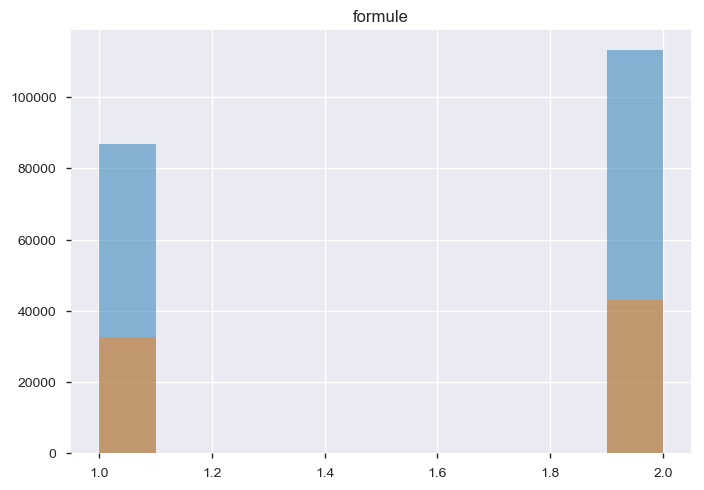

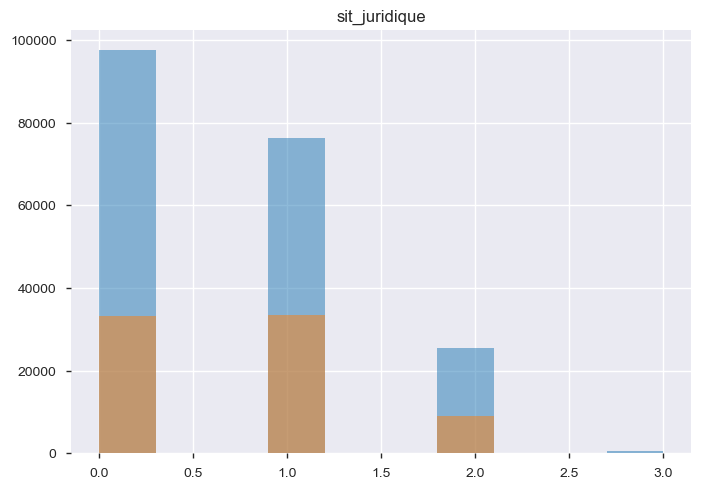

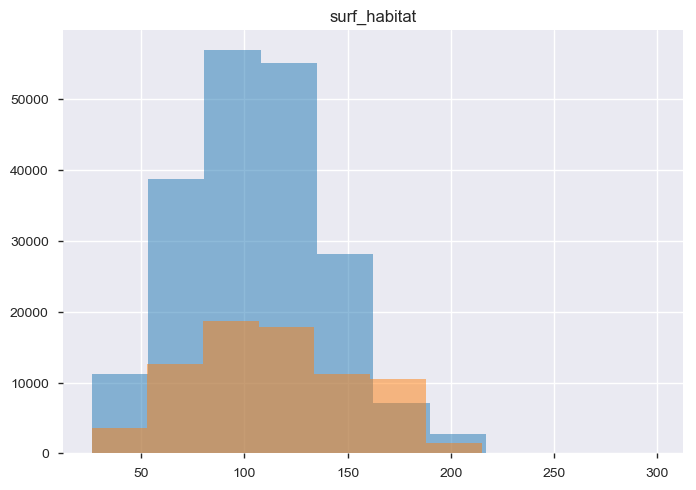

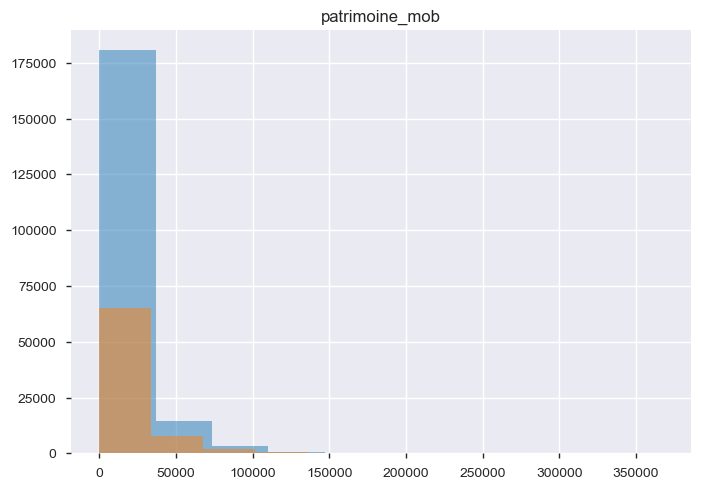

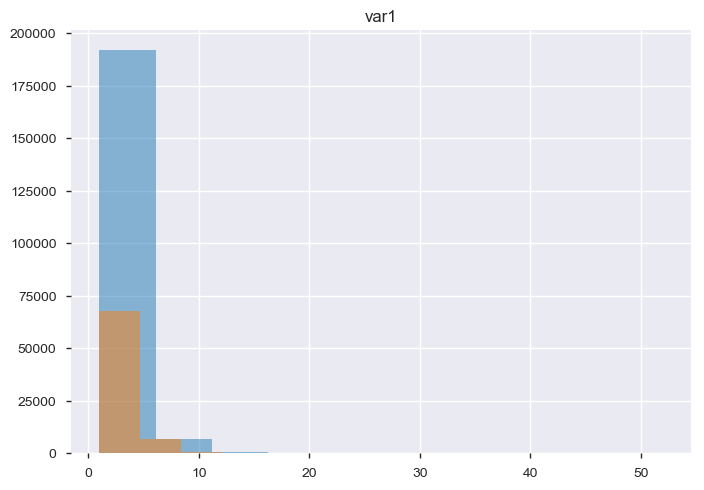

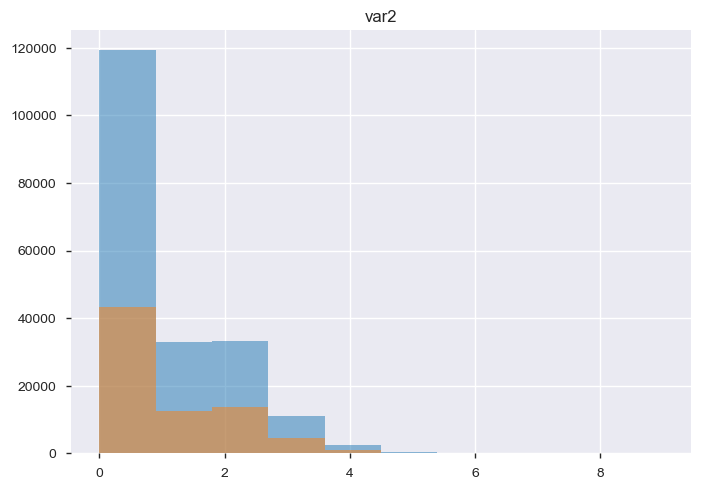

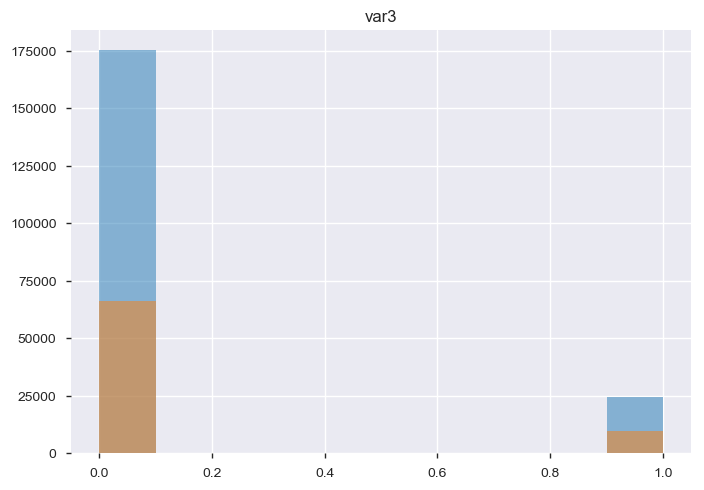

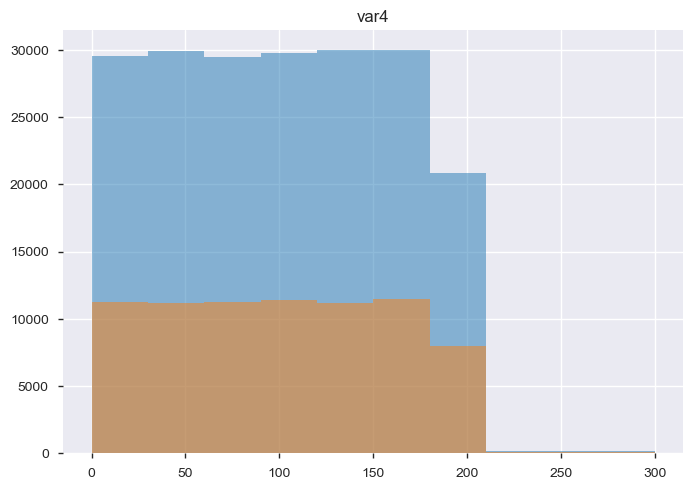

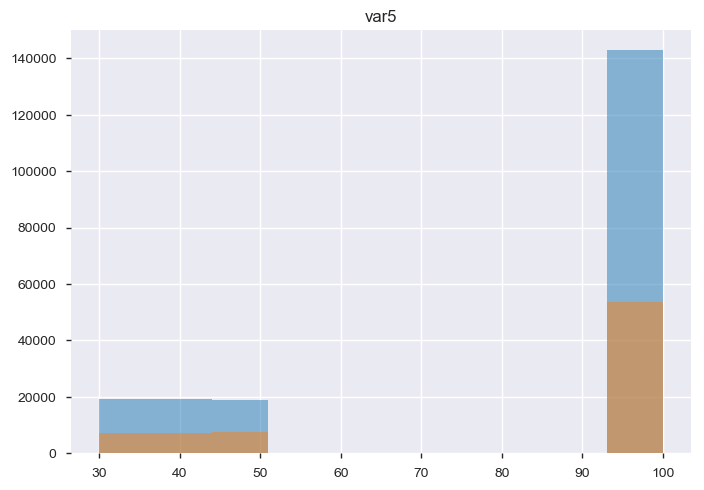

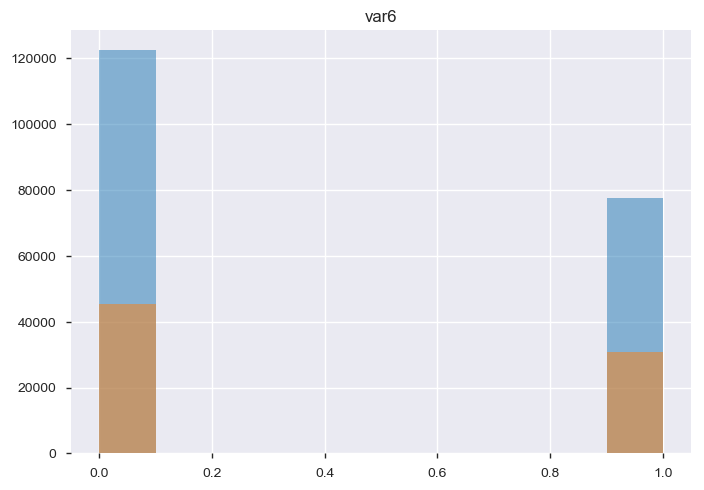

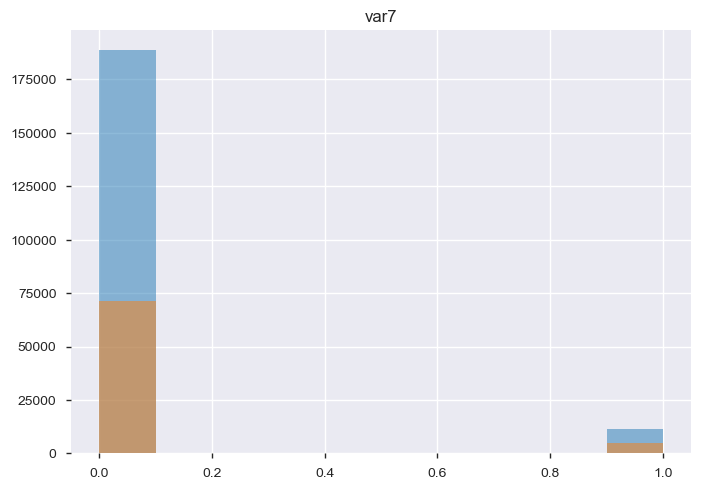

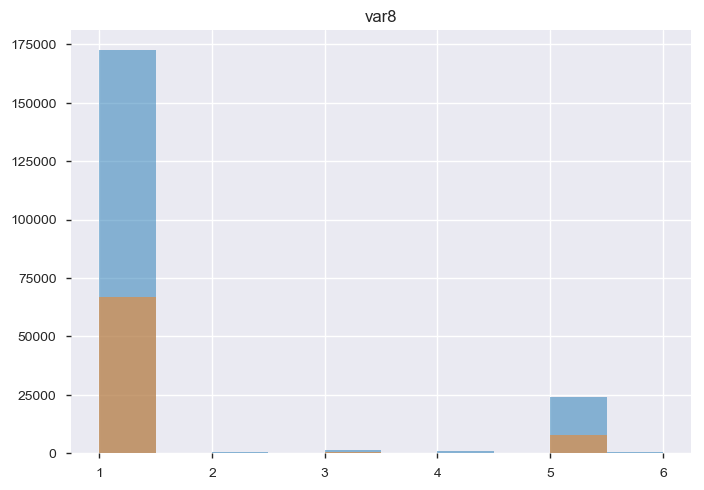

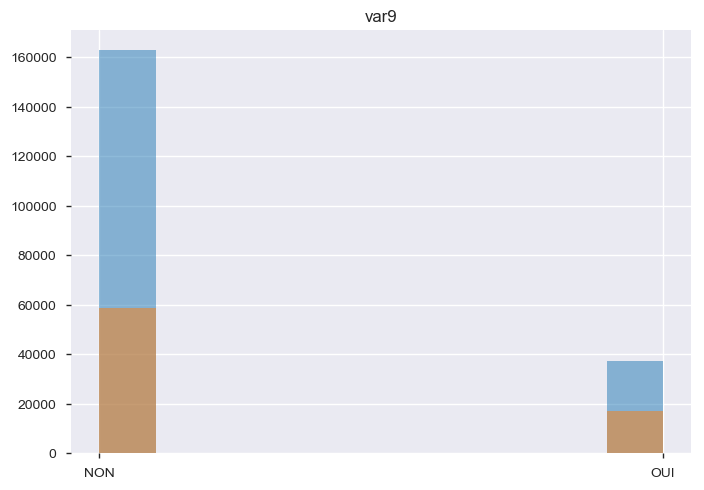

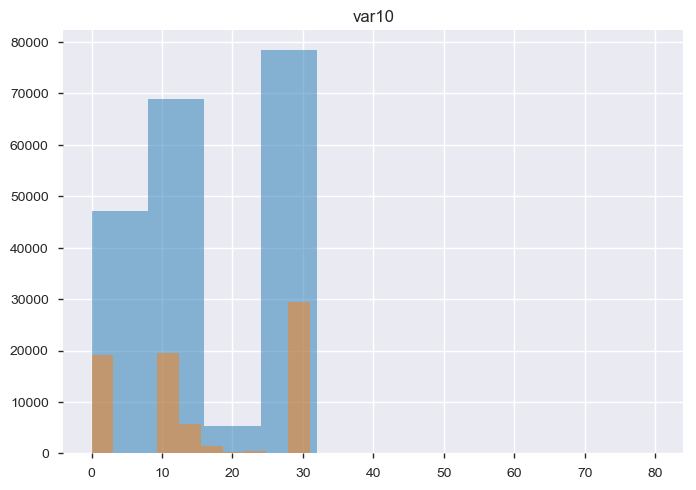

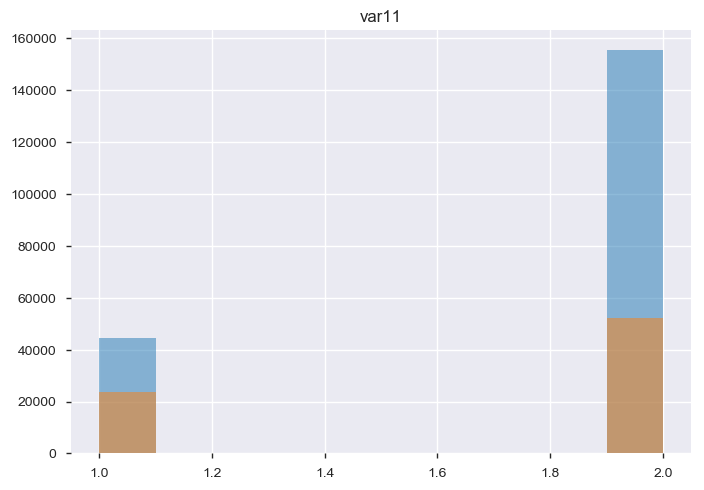

In [13]:
for column in X_train.columns:
    plt.title(column)
    plt.hist(X_train[column], alpha = 0.5, label = 'train');
    plt.hist(X_test[column], alpha = 0.5, label = 'test');
    plt.show();

#### It Would be reasonable to reproduce test NON/OUI ration on CV

In [14]:
X_train.veranda.value_counts()

NON    194793
OUI      5207
Name: veranda, dtype: int64

In [15]:
X_test.veranda.value_counts()

NON    65333
OUI    10635
Name: veranda, dtype: int64

### Redundant and new features

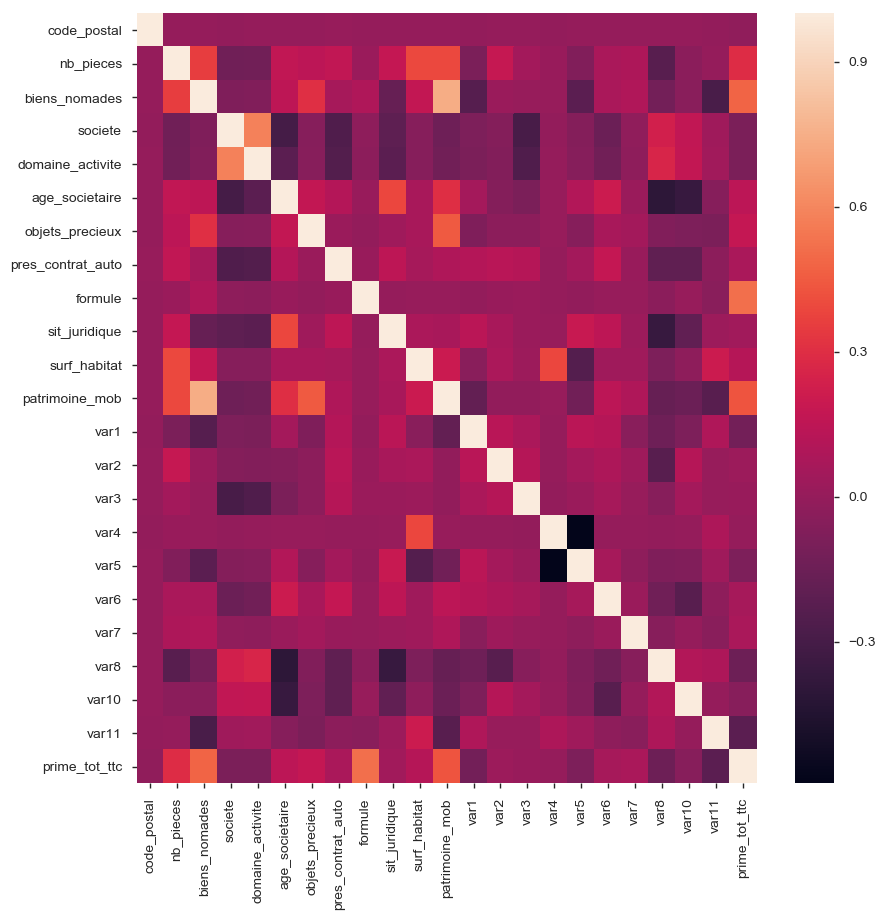

In [16]:
plt.figure(figsize=(10,10))
correlation = train.corr()
seaborn.heatmap(correlation)

As we know, house price and similar info depends of city or department in our case. So 'Paris' is more informative than 75NNN.

In [17]:
X_train['department'] = X_train['code_postal'].map(lambda x: x // 1000)
X_test['department'] = X_test['code_postal'].map(lambda x: x // 1000)

In [18]:
X_train.drop(['code_postal'], axis = 'columns', inplace = True)
X_test.drop(['code_postal'], axis = 'columns', inplace = True)

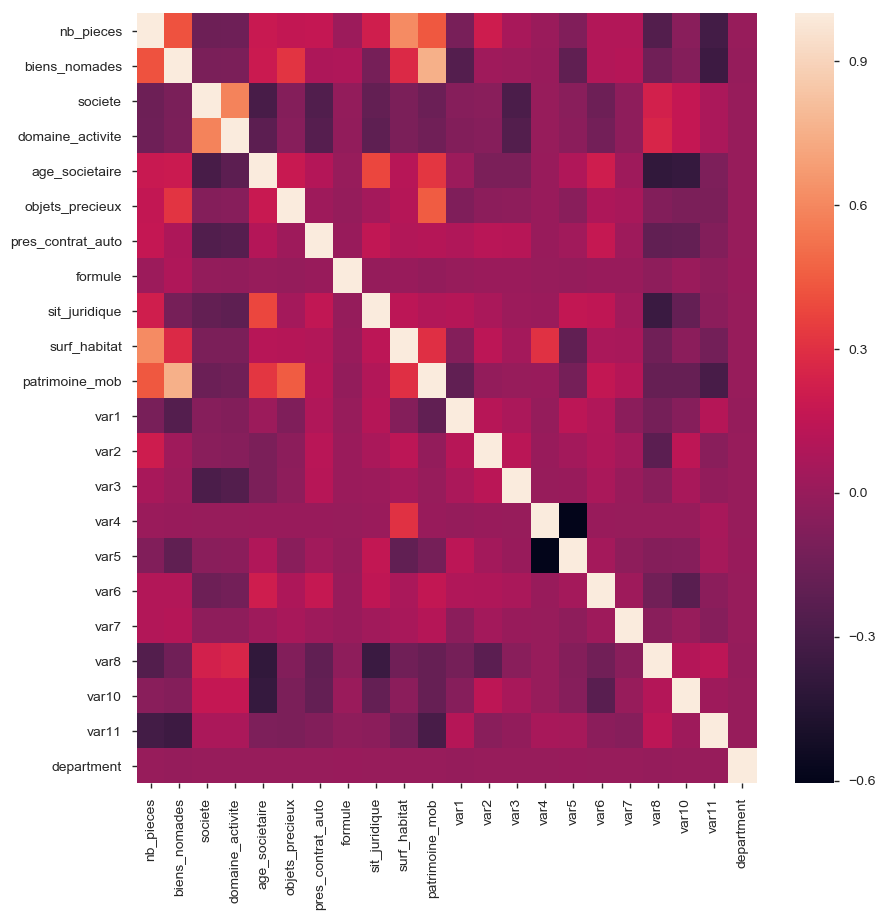

In [19]:
plt.figure(figsize=(10,10))
correlation_test = X_test.corr()
seaborn.heatmap(correlation_test);

From both correlation heatmap we can see that patrimoine_mob and biens_nomades features have large correlation and have similar correlation with each other, so one of them could be redundant.

### Transformation

In [20]:
X_train.nunique()

nb_pieces                5
veranda                  2
biens_nomades            5
sit_fam                  2
profession              18
nature_lri               6
societe                  2
domaine_activite        44
niv_urbanisation         8
age_societaire          83
objets_precieux          2
pres_contrat_auto        2
formule                  2
sit_juridique            4
surf_habitat           203
patrimoine_mob       46247
var1                    40
var2                    10
var3                     2
var4                   297
var5                    22
var6                     2
var7                     2
var8                     6
var9                     2
var10                   15
var11                    2
department              96
dtype: int64

In [21]:
X_test.nunique()

nb_pieces                6
veranda                  2
biens_nomades            5
sit_fam                  2
profession              18
nature_lri               6
societe                  2
domaine_activite        44
niv_urbanisation         8
age_societaire          83
objets_precieux          2
pres_contrat_auto        2
formule                  2
sit_juridique            4
surf_habitat           187
patrimoine_mob       32816
var1                    34
var2                    10
var3                     2
var4                   290
var5                    22
var6                     2
var7                     2
var8                     6
var9                     2
var10                   14
var11                    2
department              96
dtype: int64

#### Profession need encoding but not need split, couse proffessions don't intersect

In [22]:
X_train['profession'].value_counts()

enseignant; formateur; chercheur                             72666
agent; employe                                               54004
cadre; ingenieur                                             23711
educateur; animateur; moniteur                               10068
technicien                                                    9718
demandeur d'emploi                                            4859
homme ou femme au foyer                                       4094
profession liberale                                           3997
etudiant                                                      3592
profession de l'information des arts et des spectacles        3497
ouvrier                                                       3139
profession intermediaire de la sante et du travail social     2254
commercant                                                    1205
contremaitre; agent de maitrise                               1023
chef d'entreprise                                             

#### nature_lri need encoding

In [23]:
X_train.nature_lri.value_counts()

Appartement                        110302
Maison                              68488
Sans information                    19262
R�sidence de retraite                1145
Mobil home                            799
Local utilitaire distinct (LUD)         4
Name: nature_lri, dtype: int64

#### biens_nomades need normalization

In [24]:
X_train.biens_nomades.value_counts()

500     116604
1000     54448
0        26070
1500      2816
2000        62
Name: biens_nomades, dtype: int64

In [25]:
X_train.biens_nomades = X_train.biens_nomades // 500
X_test.biens_nomades = X_test.biens_nomades // 500

#### sit_fam need encoding

In [26]:
X_train.sit_fam.value_counts()

Famille       102443
Indivividu     97557
Name: sit_fam, dtype: int64

In [27]:
X_train.sit_fam = X_train.sit_fam.map(lambda x: 1 if x == 'Famille' else 0)
X_test.sit_fam = X_test.sit_fam.map(lambda x: 1 if x == 'Famille' else 0)

#### veranda need encoding

In [28]:
X_train.veranda.value_counts()

NON    194793
OUI      5207
Name: veranda, dtype: int64

In [29]:
X_train.veranda = X_train.veranda.map(lambda x: 1 if x == 'OUI' else 0)
X_test.veranda = X_test.veranda.map(lambda x: 1 if x == 'OUI' else 0)

#### societe need encoding

In [30]:
X_train.societe.value_counts()

1    124347
2     75653
Name: societe, dtype: int64

In [31]:
X_train.societe = X_train.societe - 1
X_test.societe = X_test.societe - 1

#### domaine_activite need encoding

In [32]:
X_train.domaine_activite.value_counts().head()

2     33543
1     29225
0     16566
99    12548
34    10715
Name: domaine_activite, dtype: int64

#### department need encoding

In [33]:
X_train.department.value_counts().head()

75    13439
13     7996
69     6291
38     5978
97     5880
Name: department, dtype: int64

#### niv_urbanisation need order encoding

In [34]:
X_train.niv_urbanisation.value_counts()

A    42970
G    40950
B    39486
F    28154
D    19445
C    17506
~     6075
E     5414
Name: niv_urbanisation, dtype: int64

In [35]:
mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1, '~': 0}

In [36]:
X_train.niv_urbanisation = X_train.niv_urbanisation.map(lambda x: mapping[x])

In [37]:
X_test.niv_urbanisation = X_test.niv_urbanisation.map(lambda x: mapping[x])

#### objets_precieux need encoding

In [38]:
X_train.objets_precieux.value_counts()

1    191662
2      8338
Name: objets_precieux, dtype: int64

In [39]:
X_train.objets_precieux = X_train.objets_precieux - 1
X_test.objets_precieux = X_test.objets_precieux - 1

#### formule need encoding

In [40]:
X_train.formule.value_counts()

2    113218
1     86782
Name: formule, dtype: int64

In [41]:
X_train.formule = X_train.formule - 1
X_test.formule = X_test.formule - 1

#### var11 and var9 needs encoding

In [42]:
X_train.var11.value_counts()

2    155474
1     44526
Name: var11, dtype: int64

In [43]:
X_train.var11 = X_train.var11 - 1
X_test.var11 = X_test.var11 - 1

In [44]:
X_train.var9.value_counts()

NON    162839
OUI     37161
Name: var9, dtype: int64

In [45]:
X_train.var9 = X_train.var9.map(lambda x: 1 if x == 'OUI' else 0)
X_test.var9 = X_test.var9.map(lambda x: 1 if x == 'OUI' else 0)

#### dummies encoding

Hmm... 'domain_activite' has a lot of unique values and has nothing in common with insurance, and maybe has correlation with profession, so we just drop it, to increase perfomance. Maybe I'm wrong.

In [105]:
X_train_encoded = pd.get_dummies(X_train, columns = ['profession', 'nature_lri', 'department']).drop(['domaine_activite'], axis = 'columns')

In [106]:
X_test_encoded = pd.get_dummies(X_test, columns = ['profession', 'nature_lri', 'department']).drop(['domaine_activite'], axis = 'columns')

### Evaluation using KFold

#### Select best features

In [48]:
import os
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import make_scorer

In [49]:
scorer = make_scorer(MAPE, greater_is_better = False)

In [50]:
#polynomial_features = PolynomialFeatures(interaction_only = True)
select_k_best = SelectKBest(f_regression)
pipe = make_pipeline(select_k_best, Ridge())

In [51]:
pipe

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_regression at 0x116a400d0>)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [52]:
X_train_encoded.shape

(200000, 144)

In [53]:
param_grid = {
    'selectkbest__k': [i*10 for i in range(1, 15)],
    #'polynomialfeatures__degree': [1, 2]
    'ridge__alpha': [0.1, 0.5, 1, 3, 5, 10, 20, 50, 100]
}

grid_search = GridSearchCV(
    pipe,
    param_grid = param_grid,
    scoring = scorer,
    cv = 5,
    n_jobs = 5,
    verbose = 2,
    return_train_score = True
)

In [54]:
grid_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   1.1s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   1.2s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   1.2s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .........

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   13.7s


[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   1.8s
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   1.8s
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   1.8s
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   1.9s
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   2.1s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   2.1s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   2.0s
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   1.9s
[CV] r

[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   1.6s
[CV] ridge__alpha=0.5, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   1.5s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   1.6s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   1.6s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   1.7s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   1.8s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   1.6s
[CV] ridge__alpha=0.5, selectkbest__k=70 .............................
[CV] .

[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   1.5s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   1.4s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   1.4s


[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.2min


[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   1.5s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   1.5s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   1.6s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   1.6s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   1.6s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   1.6s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   1.6s
[CV] r

[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   1.2s
[CV] r

[CV] ridge__alpha=3, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   2.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   2.2s
[CV] r

[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   1.8s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   1.8s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   2.1s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   2.5s
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   2.4s
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   2.5s
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   2.5s
[CV] r

[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  2.8min


[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   1.8s
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   1.5s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   1.7s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   1.3s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   1.4s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   1.4s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   1.3s
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   1.5s
[CV] r

[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   2.8s
[CV] ridge__alpha=10, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   2.4s
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   2.3s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   2.3s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   2.2s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   1.2s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   1.2s
[CV] ridge__alpha=20, selectkbest__k=20 ..............................
[CV] .

[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   2.0s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   2.0s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   2.0s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   2.1s
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   2.0s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   2.1s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   2.0s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] .

[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.8s
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.8s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.8s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.9s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.9s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   1.7s
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   1.7s
[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] .

[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   1.3s
[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   1.4s
[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.5s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.7s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.7s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.7s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.8s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .

[Parallel(n_jobs=5)]: Done 630 out of 630 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_regression at 0x116a400d0>)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'selectkbest__k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140], 'ridge__alpha': [0.1, 0.5, 1, 3, 5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(MAPE, greater_is_better=False), verbose=2)

In [55]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=140, score_func=<function f_regression at 0x116a400d0>)), ('ridge', Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [56]:
grid_search.cv_results_

{'mean_fit_time': array([1.10122094, 1.22871556, 1.29190311, 1.55835619, 1.53417401,
        1.54432936, 1.73760667, 1.89401531, 1.85415506, 1.8779552 ,
        2.03349338, 2.00478702, 2.01858358, 2.05307946, 1.0617516 ,
        1.17956095, 1.2732872 , 1.40179415, 1.53244309, 1.5148488 ,
        1.66409011, 1.64679766, 1.69817824, 1.83059759, 1.89449139,
        1.93338184, 1.94941339, 2.13932004, 1.13807316, 1.27749157,
        1.36733804, 1.39786119, 1.58514609, 1.89141445, 1.64082251,
        1.5753993 , 1.72896819, 1.74435215, 1.77251935, 1.94967847,
        2.03377876, 2.04027114, 0.98937058, 1.1725636 , 1.21142921,
        1.28153753, 1.35739522, 1.43893561, 1.53136172, 1.60570431,
        1.7143434 , 1.76617522, 1.76524105, 1.90142665, 1.95106702,
        2.02815609, 1.10133266, 1.18209357, 1.30744448, 1.39054255,
        1.44308143, 1.51240015, 1.55240345, 1.59043932, 1.67567735,
        1.73797531, 2.39680738, 2.72286634, 2.11765108, 2.83464303,
        1.5020812 , 1.41828542,

In [145]:
regressor = Ridge(alpha = 20)

cv_mape = cross_val_score(regressor, X_train_encoded, y_train, scoring = scorer, n_jobs = os.cpu_count() // 2, cv = 5)
cv_mape = - pd.Series(cv_mape).mean()

regressor.fit(X_train_encoded, y_train)
train_mape = MAPE(y_train, regressor.predict(X_train_encoded))
test_mape = MAPE(y_test, regressor.predict(X_test_encoded))

In [146]:
print('Cross-validation MAPE: {}\nTrain MAPE: {}\nTest MAPE: {}'.format(cv_mape, train_mape, test_mape))

Cross-validation MAPE: 15.274150158750327
Train MAPE: 15.26030152226538
Test MAPE: 15.34846733999228


### Validation using weighted split by 'veranda'

In [ ]:
#To be continued, time to sleep:)

In [120]:
from sklearn.model_selection import train_test_split

In [88]:
train_veranda_counts = X_train_encoded.veranda.value_counts()
train_veranda_counts

0    194793
1      5207
Name: veranda, dtype: int64

In [89]:
test_veranda_counts = X_test_encoded.veranda.value_counts()
test_veranda_counts

0    65333
1    10635
Name: veranda, dtype: int64

In [92]:
test_veranda_rate = test_veranda_counts[0]/test_veranda_counts[1]
test_veranda_rate

6.143206393982134

In [94]:
estimated_train_veranda_counts_false = int(train_veranda_counts[1]*test_veranda_rate)
estimated_train_veranda_counts_false

31987

In [110]:
X_train_encoded_not_V = X_train_encoded[X_train_encoded.veranda == 0]
X_train_encoded_not_V.shape

(194793, 144)

In [133]:
folds = 5
CViterator = []

size, columns = X_train_encoded_not_V.shape
step = size // folds

In [134]:
veranda_true_cv = X_train_encoded[X_train_encoded.veranda == 1]

for i in range(folds):
    samples = X_train_encoded_not_V.iloc[step*i:step*(i+1), :]
    
    veranda_false_cv = samples
    if(step > estimated_train_veranda_counts_false):
        veranda_false_cv = samples.sample(estimated_train_veranda_counts_false)

    concat = veranda_false_cv.append(veranda_true_cv)   
    train_indices, test_indices = train_test_split(concat, train_size = 0.8, test_size = 0.2, shuffle = True)
    CViterator.append((train_indices.index, test_indices.index))

In [137]:
param_grid = {
    'selectkbest__k': [i*10 for i in range(1, 15)],
    #'polynomialfeatures__degree': [1, 2]
    'ridge__alpha': [0.1, 0.5, 1, 3, 5, 10, 20, 50, 100]
}

grid_search = GridSearchCV(
    pipe,
    param_grid = param_grid,
    scoring = scorer,
    cv = CViterator,
    n_jobs = 5,
    verbose = 2,
    return_train_score = True
)

grid_search.fit(X_train_encoded, y_train)
grid_search.best_estimator_

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   0.6s
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=10 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=10, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=20, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=20, total=   0.5s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=20, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=20, total=   0.5s
[CV] ridge__alpha=0.1, selectkbest__k=30 .............................
[CV] ridge__alpha=0.1, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=30, total=   0.7s
[CV] .............. ridge__alpha=0.1, selectkbest__k=30, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=30 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=40, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=40, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=50 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=50, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=50, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=50, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=60 .............................
[CV] ridge__alpha=0.1, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=50, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=60, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=60, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=70 .............................
[CV] ridge__alpha=0.1, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=60, total=   0.6s
[CV] .............. ridge__alpha=0.1, selectkbest__k=60, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=70 .............................
[CV] ridge__alpha=0.1, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   0.6s


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    8.2s


[CV] ridge__alpha=0.1, selectkbest__k=80 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   0.6s
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=70, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=90 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn

[CV] ridge__alpha=0.1, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.1, selectkbest__k=90, total=   0.7s
[CV] .............. ridge__alpha=0.1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=100 ............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=100 ............................
[CV] .............. ridge__alpha=0.1, selectkbest__k=90, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=100 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=100, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=0.1, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.1, selectkbest__k=100, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=110 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=100, total=   0.7s
[CV] ridge__alpha=0.1, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=0.1, selectkbest__k=110 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] ............. ridge__alpha=0.1, selectkbest__k=110, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=110, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=110, total=   1.0s
[CV] ............. ridge__alpha=0.1, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=120 ............................
[CV] ridge__alpha=0.1, selectkbest__k=120 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.1, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=120, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=0.1, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.1, selectkbest__k=130 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.1, selectkbest__k=130, total=   1.0s
[CV] ridge__alpha=0.1, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=130, total=   1.1s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.1, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=0.1, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=0.1, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=0.1, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=0.5, selectkbest__k=10 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.1, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=0.5, selectkbest__k=10 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.1, selectkbest__k=140, total=   1.5s
[CV] ridge__alpha=0.5, selectkbest__k=10 .............................
[CV] ............. ridge__alpha=0.1, selectkbest__k=140, total=   1.5s
[CV] ridge__alpha=0.5, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=10, total=   1.1s
[CV] ............. ridge__alpha=0.1, selectkbest__k=140, total=   1.5s
[CV] .............. ridge__alpha=0.5, selectkbest__k=10, total=   1.0s
[CV] ridge__alpha=0.5, selectkbest__k=10 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=10, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=10, total=   0.7s
[CV] .............. ridge__alpha=0.5, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=20 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=20 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=20, total=   0.5s
[CV] ridge__alpha=0.5, selectkbest__k=30 .............................
[CV] ridge__alpha=0.5, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=30 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] .............. ridge__alpha=0.5, selectkbest__k=30, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=40 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=50 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=50 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=60 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=70 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=70 .............................
[CV] ridge__alpha=0.5, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   0.8s
[CV] .............. ridge__alpha=0.5, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=70, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=70, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=80 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=70, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=70, total=   0.6s
[CV] ridge__alpha=0.5, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=0.5, selectkbest__k=80 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=90 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=80, total=   1.0s
[CV] ridge__alpha=0.5, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=90, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=90 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=0.5, selectkbest__k=90, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=100 ............................
[CV] ridge__alpha=0.5, selectkbest__k=100 ............................
[CV] .............. ridge__alpha=0.5, selectkbest__k=90, total=   0.9s
[CV] .............. ridge__alpha=0.5, selectkbest__k=90, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=100 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=100, total=   1.3s
[CV] ridge__alpha=0.5, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=100, total=   1.3s
[CV] ridge__alpha=0.5, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=100, total=   1.2s
[CV] ridge__alpha=0.5, selectkbest__k=110 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=0.5, selectkbest__k=120 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=0.5, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=110, total=   0.8s
[CV] ............. ridge__alpha=0.5, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=120 ............................
[CV] ridge__alpha=0.5, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=120, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=0.5, selectkbest__k=130 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=120, total=   0.8s
[CV] ridge__alpha=0.5, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=0.5, selectkbest__k=130 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=130, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=0.5, selectkbest__k=140 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=0.5, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=0.5, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=130, total=   1.2s
[CV] ............. ridge__alpha=0.5, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=0.5, selectkbest__k=140 ............................
[CV] ridge__alpha=0.5, selectkbest__k=140 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=10 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=0.5, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=10 ...............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=10 ...............................
[CV] ............. ridge__alpha=0.5, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=10, total=   0.8s
[CV] ............. ridge__alpha=0.5, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=10, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=10, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=10, total=   0.5s
[CV] ridge__alpha=1, selectkbest__k=20 ...............................
[CV] ridge__alpha=1, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=20 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   0.7s
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=1, selectkbest__k=40 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   38.2s


[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=50 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=50, total=   0.8s
[CV] ................ ridge__alpha=1, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=50 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=70 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=60, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=60, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=60, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=70, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=70, total=   0.9s
[CV] ridge__alpha=1, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=70, total=   0.8s
[CV] ................ ridge__alpha=1, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=80, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] ridge__alpha=1, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=80, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=1, selectkbest__k=90 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=80, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=90 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=1, selectkbest__k=100 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ................ ridge__alpha=1, selectkbest__k=90, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=1, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=1, selectkbest__k=100 ..............................
[CV] ridge__alpha=1, selectkbest__k=100 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ridge__alpha=1, selectkbest__k=110 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=100, total=   0.9s
[CV] ............... ridge__alpha=1, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=1, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=1, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=110 ..............................
[CV] ridge__alpha=1, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=110, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=1, selectkbest__k=120 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=1, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=120 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=130 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=120, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=1, selectkbest__k=130 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=1, selectkbest__k=140 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=130, total=   1.3s
[CV] ridge__alpha=1, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=130, total=   1.3s
[CV] ridge__alpha=1, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=1, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=1, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=1, selectkbest__k=140 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=140, total=   1.2s
[CV] ridge__alpha=3, selectkbest__k=10 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=1, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=10 ...............................
[CV] ............... ridge__alpha=1, selectkbest__k=140, total=   1.2s
[CV] ridge__alpha=3, selectkbest__k=10 ...............................
[CV] ............... ridge__alpha=1, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   0.9s
[CV] ............... ridge__alpha=1, selectkbest__k=140, total=   1.2s
[CV] ridge__alpha=3, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=10, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=20 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=30 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   1.1s
[CV] ................ ridge__alpha=3, selectkbest__k=20, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ridge__alpha=3, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=30, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=30, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=30, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=30, total=   0.8s
[CV] ................ ridge__alpha=3, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=40 ...............................
[CV] ridge__alpha=3, selectkbest__k=40 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=40, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=50 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=50, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=70 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=70, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=70 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=70, total=   0.7s
[CV] ridge__alpha=3, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=80 ...............................
[CV] ridge__alpha=3, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=70, total=   0.9s
[CV] ................ ridge__alpha=3, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=3, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=90 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=90 ...............................
[CV] ridge__alpha=3, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=80, total=   1.0s
[CV] ................ ridge__alpha=3, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=3, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=90 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=3, selectkbest__k=90, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=3, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=100 ..............................
[CV] ridge__alpha=3, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=3, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=3, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=3, selectkbest__k=100 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=100, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=100, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=100, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=100, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=110, total=   1.1s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=110, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=130 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=3, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=3, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=3, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=120, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=130 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   1.5s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   1.4s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   1.3s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=3, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=3, selectkbest__k=140 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=10 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=10 ...............................
[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=10 ...............................
[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=10, total=   0.8s
[CV] ............... ridge__alpha=3, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=10 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=10, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=10, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=10, total=   0.7s
[CV] ................ ridge__alpha=5, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=20 ...............................
[CV] ridge__alpha=5, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=20 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=20, total=   0.7s
[CV] ................ ridge__alpha=5, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=30 ...............................
[CV] ridge__alpha=5, selectkbest__k=30 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=30 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=30, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=40 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=40 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=40, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=50 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=50 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=50, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=60 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=60 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=60, total=   0.6s
[CV] ridge__alpha=5, selectkbest__k=70 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=70 ...............................
[CV] ridge__alpha=5, selectkbest__k=70 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=70, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=80 ...............................
[CV] ridge__alpha=5, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=70, total=   0.8s
[CV] ................ ridge__alpha=5, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=80 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=80 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=80, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=80, total=   1.2s
[CV] ridge__alpha=5, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=80, total=   1.2s
[CV] ridge__alpha=5, selectkbest__k=90 ...............................
[CV] ................ ridge__alpha=5, selectkbest__k=80, total=   1.1s
[CV] ridge__alpha=5, selectkbest__k=90 ...............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ................ ridge__alpha=5, selectkbest__k=90, total=   1.0s
[CV] ................ ridge__alpha=5, selectkbest__k=90, total=   1.0s
[CV] ridge__alpha=5, selectkbest__k=100 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=5, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=100 ..............................
[CV] ................ ridge__alpha=5, selectkbest__k=90, total=   0.8s
[CV] ................ ridge__alpha=5, selectkbest__k=90, total=   0.7s
[CV] ridge__alpha=5, selectkbest__k=100 ..............................
[CV] ridge__alpha=5, selectkbest__k=100 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ridge__alpha=5, selectkbest__k=110 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   0.8s
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=120 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=120, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=120, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=5, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=130 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=130 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=5, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=140 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=5, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=140 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=5, selectkbest__k=140 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=5, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=10 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ............... ridge__alpha=5, selectkbest__k=140, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=140, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=5, selectkbest__k=140, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=10, total=   0.8s
[CV] ............... ridge__alpha=5, selectkbest__k=140, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=10, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=10, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=10, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=10, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=20 ..............................


[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:  1.5min


[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=20, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=10, selectkbest__k=40 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=40 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=40, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] ridge__alpha=10, selectkbest__k=50 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=40, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=40, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=40, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=50, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=60 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=50, total=   1.0s
[CV] ridge__alpha=10, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=50, total=   0.9s
[CV] ............... ridge__alpha=10, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=10, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=60 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=70 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=60, total=   1.0s
[CV] ridge__alpha=10, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=70 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=80 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=70, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=70, total=   1.0s
[CV] ............... ridge__alpha=10, selectkbest__k=70, total=   1.0s
[CV] ridge__alpha=10, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=80, total=   1.0s
[CV] ridge__alpha=10, selectkbest__k=80 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=80, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=10, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=90 ..............................
[CV] ridge__alpha=10, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=10, selectkbest__k=90, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=10, selectkbest__k=90, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=10, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=10, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=10, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=100 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=100, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=10, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=10, selectkbest__k=110 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=100, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=100, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=110, total=   1.2s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=10, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=120 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=10, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=10, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=10, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=120, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=120, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=10, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   1.3s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   1.2s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=10, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   1.3s
[CV] ridge__alpha=10, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   1.4s
[CV] ridge__alpha=10, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=10, selectkbest__k=130, total=   1.4s
[CV] ridge__alpha=10, selectkbest__k=140 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   1.6s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   1.5s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   1.3s
[CV] .............. ridge__alpha=10, selectkbest__k=140, total=   1.6s
[CV] ridge__alpha=20, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   1.2s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   0.6s
[CV] ............... ridge__alpha=20, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=20, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=20, selectkbest__k=20 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=20, selectkbest__k=20 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] ............... ridge__alpha=20, selectkbest__k=20, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=20, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=20, total=   0.9s
[CV] ............... ridge__alpha=20, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=30, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=20, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=30, total=   0.6s
[CV] ridge__alpha=20, selectkbest__k=40 ..............................
[CV] ridge__alpha=20, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=40 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=40, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=40, total=   0.7s
[CV] ............... ridge__alpha=20, selectkbest__k=40, total=   0.6s
[CV] ridge__alpha=20, selectkbest__k=50 ..............................
[CV] ridge__alpha=20, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=50 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=60 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=60, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=70 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=60, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=70 ..............................
[CV] ridge__alpha=20, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=70, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=20, selectkbest__k=70, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=80 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=70, total=   1.2s
[CV] ............... ridge__alpha=20, selectkbest__k=70, total=   1.1s
[CV] ridge__alpha=20, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=70, total=   1.1s
[CV] ridge__alpha=20, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=80, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=80 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=20, selectkbest__k=90 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ............... ridge__alpha=20, selectkbest__k=80, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=80, total=   1.0s
[CV] ............... ridge__alpha=20, selectkbest__k=80, total=   0.8s
[CV] ridge__alpha=20, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=20, selectkbest__k=90, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=90 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=20, selectkbest__k=90, total=   1.1s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=20, selectkbest__k=90, total=   1.1s
[CV] ridge__alpha=20, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=20, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=20, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=100 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=100, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=100, total=   1.1s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=100, total=   1.3s
[CV] ridge__alpha=20, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=100, total=   1.3s
[CV] ridge__alpha=20, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=100, total=   1.2s
[CV] ridge__alpha=20, selectkbest__k=110 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   1.1s
[CV] ridge__alpha=20, selectkbest__k=120 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   0.9s
[CV] .............. ridge__alpha=20, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=120 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=20, selectkbest__k=130 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   1.0s
[CV] .............. ridge__alpha=20, selectkbest__k=120, total=   0.7s
[CV] ridge__alpha=20, selectkbest__k=130 .............................
[CV] ridge__alpha=20, selectkbest__k=130 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=140 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=20, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=130, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=20, selectkbest__k=130, total=   1.0s
[CV] ridge__alpha=20, selectkbest__k=140 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=10 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=20, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=20, selectkbest__k=140, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=10 ..............................
[CV] .............. ridge__alpha=20, selectkbest__k=140, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=10 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=10, total=   0.7s
[CV] .............. ridge__alpha=20, selectkbest__k=140, total=   0.9s
[CV] ............... ridge__alpha=50, selectkbest__k=10, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=10 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=10, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=10, total=   0.8s
[CV] ............... ridge__alpha=50, selectkbest__k=10, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=20 ..............................
[CV] ridge__alpha=50, selectkbest__k=20 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=20, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=50, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=30 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=30 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=30, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=40 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ............... ridge__alpha=50, selectkbest__k=30, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=40 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=40 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=40, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=50 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=40, total=   0.8s
[CV] ............... ridge__alpha=50, selectkbest__k=40, total=   0.6s
[CV] ridge__alpha=50, selectkbest__k=50 ..............................
[CV] ridge__alpha=50, selectkbest__k=50 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=50 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=60 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=50, total=   0.7s
[CV] ridge__alpha=50, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=60 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=60, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=60 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=70 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=60, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=70 ..............................
[CV] ridge__alpha=50, selectkbest__k=70 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=70, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=70, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=70, total=   0.8s
[CV] ............... ridge__alpha=50, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=80 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=80, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=90 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ............... ridge__alpha=50, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=90 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=90 ..............................
[CV] ............... ridge__alpha=50, selectkbest__k=80, total=   0.8s
[CV] ............... ridge__alpha=50, selectkbest__k=80, total=   1.1s
[CV] ridge__alpha=50, selectkbest__k=90 ..............................
[CV] ridge__alpha=50, selectkbest__k=90 ..............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=100 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.1s
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   0.8s
[CV] ............... ridge__alpha=50, selectkbest__k=90, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=100 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=100 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=50, selectkbest__k=110 .............................
[CV] ridge__alpha=50, selectkbest__k=110 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=120 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] .............. ridge__alpha=50, selectkbest__k=110, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=120 .............................
[CV] ridge__alpha=50, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=120 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=50, selectkbest__k=120 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] .............. ridge__alpha=50, selectkbest__k=120, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=130 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=120, total=   1.0s
[CV] ridge__alpha=50, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=120, total=   1.2s
[CV] ridge__alpha=50, selectkbest__k=130 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=130, total=   1.2s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=50, selectkbest__k=140 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=130, total=   1.3s
[CV] ridge__alpha=50, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=130, total=   1.4s
[CV] ridge__alpha=50, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=130, total=   1.2s
[CV] ridge__alpha=50, selectkbest__k=140 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=130, total=   1.1s
[CV] ridge__alpha=50, selectkbest__k=140 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=100, selectkbest__k=10 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=50, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=100, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=140, total=   1.4s
[CV] ridge__alpha=100, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=50, selectkbest__k=140, total=   1.4s
[CV] ridge__alpha=100, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=10, total=   0.8s
[CV] .............. ridge__alpha=50, selectkbest__k=140, total=   1.3s
[CV] ridge__alpha=100, selectkbest__k=10 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=10, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=10, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=100, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=10, total=   0.6s
[CV] ridge__alpha=100, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=100, selectkbest__k=20 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=20, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=20, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=20, total=   0.7s
[CV] ridge__alpha=100, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=20, total=   0.6s
[CV] ridge__alpha=100, selectkbest__k=30 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=30, total=   0.7s
[CV] ridge__alpha=100, selectkbest__k=30 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] .............. ridge__alpha=100, selectkbest__k=30, total=   0.6s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=30, total=   0.7s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=30, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=40 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=40, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=50 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=100, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=40, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=50, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=50 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=50, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=60 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=50, total=   1.0s
[CV] .............. ridge__alpha=100, selectkbest__k=50, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=50, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=60 .............................
[CV] ridge__alpha=100, selectkbest__k=60 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=70 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   1.0s
[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=60, total=   1.0s
[CV] ridge__alpha=100, selectkbest__k=70 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.0s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=80 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=70, total=   1.7s
[CV] ridge__alpha=100, selectkbest__k=80 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=80, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=80, total=   1.5s
[CV] ridge__alpha=100, selectkbest__k=90 .............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn

[CV] .............. ridge__alpha=100, selectkbest__k=80, total=   1.0s
[CV] ridge__alpha=100, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=80, total=   1.6s
[CV] .............. ridge__alpha=100, selectkbest__k=80, total=   1.5s
[CV] ridge__alpha=100, selectkbest__k=90 .............................
[CV] ridge__alpha=100, selectkbest__k=90 .............................
[CV] .............. ridge__alpha=100, selectkbest__k=90, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] .............. ridge__alpha=100, selectkbest__k=90, total=   1.3s
[CV] ridge__alpha=100, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=100 ............................
[CV] .............. ridge__alpha=100, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=100 ............................
[CV] .............. ridge__alpha=100, selectkbest__k=90, total=   0.9s
[CV] .............. ridge__alpha=100, selectkbest__k=90, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=100 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)


[CV] ridge__alpha=100, selectkbest__k=100 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=100, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


[CV] ridge__alpha=100, selectkbest__k=110 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=110 ............................
[CV] ridge__alpha=100, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=100, total=   0.8s
[CV] ............. ridge__alpha=100, selectkbest__k=100, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=110 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=110 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=110, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)


[CV] ............. ridge__alpha=100, selectkbest__k=110, total=   1.0s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=110, total=   1.0s
[CV] ridge__alpha=100, selectkbest__k=120 ............................
[CV] ridge__alpha=100, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=110, total=   1.0s
[CV] ............. ridge__alpha=100, selectkbest__k=110, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=120 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=120 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=120, total=   0.8s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=120, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=120, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=120, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=120, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=130 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ridge__alpha=100, selectkbest__k=130 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=130, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=140 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=130, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=130, total=   0.9s
[CV] ridge__alpha=100, selectkbest__k=140 ............................
[CV] ............. ridge__alpha=100, selectkbest__k=130, total=   0.8s
[CV] ridge__alpha=100, selectkbest__k=140 ............................


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=140, total=   0.9s


/Users/mykhailo/miniconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/mykhailo/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


[CV] ............. ridge__alpha=100, selectkbest__k=140, total=   0.9s
[CV] ............. ridge__alpha=100, selectkbest__k=140, total=   0.9s
[CV] ............. ridge__alpha=100, selectkbest__k=140, total=   1.0s
[CV] ............. ridge__alpha=100, selectkbest__k=140, total=   1.0s


[Parallel(n_jobs=5)]: Done 630 out of 630 | elapsed:  2.7min finished


Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=140, score_func=<function f_regression at 0x116a400d0>)), ('ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [143]:
regressor = grid_search.best_estimator_

cv_mape = cross_val_score(regressor, X_train_encoded, y_train, scoring = scorer, n_jobs = os.cpu_count() // 2, cv = 5)
cv_mape = - pd.Series(cv_mape).mean()

train_mape = MAPE(y_train, regressor.predict(X_train_encoded))
test_mape = MAPE(y_test, regressor.predict(X_test_encoded))

In [144]:
print('Cross-validation MAPE: {}\nTrain MAPE: {}\nTest MAPE: {}'.format(cv_mape, train_mape, test_mape))

Cross-validation MAPE: 15.273984263859433
Train MAPE: 15.260113029889984
Test MAPE: 15.348490548297953


We can see that result doesn't change, so difference in 'veranda' feature doesn't affect model. Эх...